# Mount Drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [ ]:
import pandas as pd
import numpy as np

# Import Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train.csv')

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Preprocessing

In [ ]:
feature = [ 'Warehouse_block', 'Mode_of_Shipment',
       'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender',
       'Discount_offered', 'Weight_in_gms']
target = 'Reached.on.Time_Y.N'

In [ ]:
feature

['Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms']

In [ ]:
X = pd.get_dummies(df[feature]) #convert categorical variable into dummy
y = df[target]

In [ ]:
X

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,4,1,232,5,6,1247,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,5,4,242,5,4,1155,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,5,2,223,6,2,1210,0,0,0,0,1,0,0,1,0,0,1,0,1


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [ ]:
y.value_counts(normalize=True)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

# Splitting Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split #0.6 vs 0.4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 123)

In [ ]:
X_test

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
8402,4,1,186,3,6,4758,1,0,0,0,0,0,0,1,0,1,0,1,0
2199,5,5,216,2,33,3202,0,1,0,0,0,1,0,0,1,0,0,0,1
7161,6,2,306,4,6,1123,0,1,0,0,0,0,0,1,0,1,0,1,0
6779,4,4,273,3,3,5749,0,0,0,0,1,0,0,1,0,1,0,1,0
566,3,1,163,4,20,1940,1,0,0,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10197,5,5,245,5,5,1252,0,1,0,0,0,0,0,1,0,1,0,0,1
804,3,4,130,2,42,1213,0,0,0,1,0,0,1,0,0,0,1,1,0
7800,4,5,192,2,4,4518,0,0,0,1,0,0,1,0,1,0,0,1,0
3475,6,4,100,5,7,5668,0,0,0,0,1,0,0,1,0,1,0,1,0


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)


In [ ]:
coef = {'feature':X.columns, #memunculkan hasil pemodelan
'coef' : logreg.coef_[0]}

In [ ]:
pd.DataFrame(coef)

,feature,coef
0,Customer_care_calls,-0.099587
1,Customer_rating,0.062396
2,Cost_of_the_Product,0.000607
3,Prior_purchases,-0.032824
4,Discount_offered,0.117813
5,Weight_in_gms,-0.000172
6,Warehouse_block_A,-0.031804
7,Warehouse_block_B,0.070174
8,Warehouse_block_C,0.024053
9,Warehouse_block_D,0.050716


In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6404545454545455

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1012,  767],
       [ 815, 1806]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print("accuracy:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1779
           1       0.70      0.69      0.70      2621

    accuracy                           0.64      4400
   macro avg       0.63      0.63      0.63      4400
weighted avg       0.64      0.64      0.64      4400

accuracy: 0.6404545454545455


# Challenge Supervised Learning
https://www.kaggle.com/prachi13/customer-analytics

# Tugas Visualisasi Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt #creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
museum_filepath = "/content/drive/MyDrive/Colab Notebooks/museum_visitors.csv"

In [ ]:
museum_data = pd.read_csv(museum_filepath, index_col="Date", parse_dates=True)
museum_data

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694
2014-06-01,29487,5751,2121,11036
2014-07-01,32378,5406,2239,13490
2014-08-01,37680,8619,1769,9139
2014-09-01,28473,61192,1073,5661


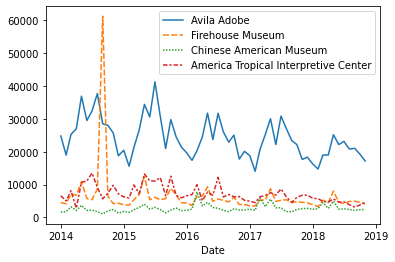

In [ ]:
sns.lineplot(data=museum_data)

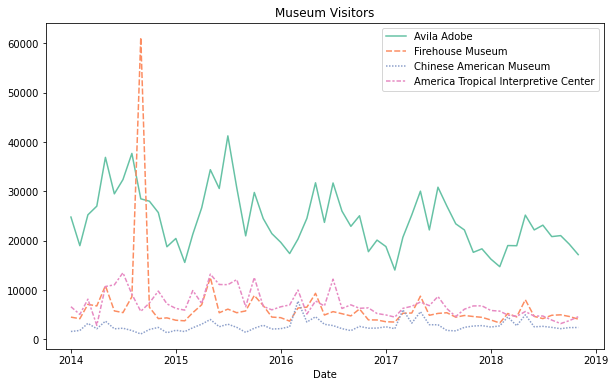

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6)) #lebar X tinggi
# Add title
plt.title("Museum Visitors")
sns.lineplot(data=museum_data, palette="Set2")